# Introduction

Every successful business runs on data — but real value comes from understanding what the numbers actually mean.  
In this project, I took a deep dive into sales data Superstore Dataset (2014–2017) to answer one big question:  
**How can we make smarter decisions to boost profit and growth?**

The dataset covers more than 9,000 transactions, including details about products, customers, sales, profit, and shipping.

**What did I set out to do?**
- Spot the patterns: When do people buy the most? Which months or seasons matter?
- Find the winners and losers: Which products, regions, and customers are truly profitable? Which are dragging us down?
- Dig into the "why": What really drives profit or loss? (Is it discounts, shipping, location, or something else?)
- Predict the future: Can we build a model that accurately predicts profit for new orders?
- Share clear, practical insights any manager could use.

You'll see not just fancy charts and numbers, but a story:  
How a superstore can use its data to work smarter, not just harder.

---

*Whether you're a data geek, a business leader, or just curious — this analysis will walk you step by step from raw data to valuable business lessons. Let's get started!*


# Data Preparation

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


## Importing Libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_context('notebook', font_scale=1.2)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

%matplotlib inline


## Load Data

In [ ]:
df = pd.read_csv('../input/superstore-dataset-final/Sample - Superstore.csv', encoding='windows-1252') # This line will read the csv file

## Initial Data Exploration

In [76]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [78]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [79]:
df.shape

(9994, 21)

## Data Cleaning

# Check missing values & duplicates


In [80]:
# Missing values 
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [81]:
# Remove duplicates
df.duplicated().sum()

0

In [82]:
df.drop_duplicates(inplace=True)

# Convert to datetime

In [83]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Value Counts for Key Categorical Features

In [84]:
for col in ['Category', 'Region']:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())


Value Counts for Category:
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

Value Counts for Region:
Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64


# Exploratory Data Analysis (EDA)

## Correlation Matrix

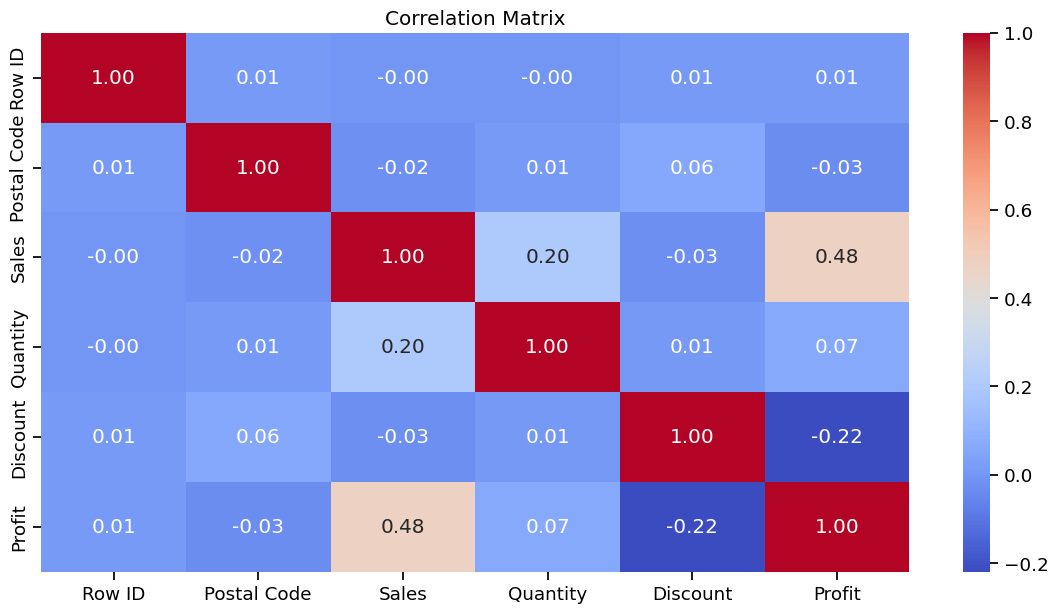

In [85]:
plt.figure(figsize=(14, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

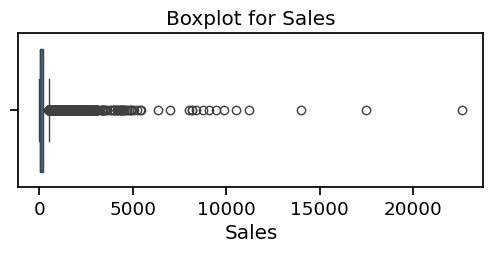

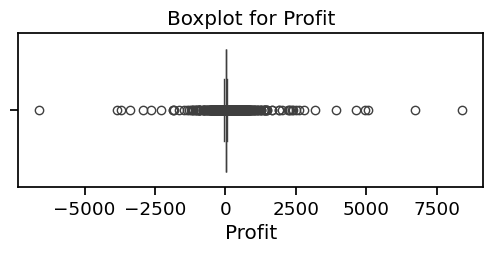

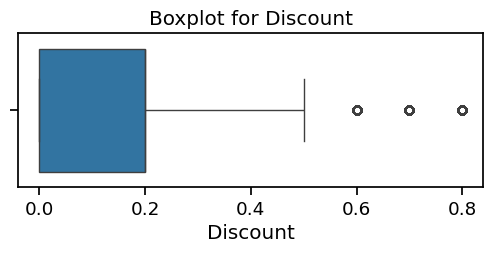

In [86]:
for col in ['Sales', 'Profit', 'Discount']:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

## Handle Outliers

In [87]:
q_low = df['Profit'].quantile(0.01)
q_high = df['Profit'].quantile(0.99)
df_clean = df[(df['Profit'] > q_low) & (df['Profit'] < q_high)]

# Feature Engineering

In [88]:
df['YearMonth'] = df['Order Date'].dt.to_period('M')
df['OrderY'] = df['Order Date'].dt.year
df['OrderM'] = df['Order Date'].dt.month

In [89]:
df['Discounted Sales'] = df['Sales'] * (1 - df['Discount'])
df['Sales per Quantity'] = df['Sales'] / df['Quantity']
df['Profit Margin'] = df['Profit'] / df['Sales']
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days 

## Monthly Sales Trend

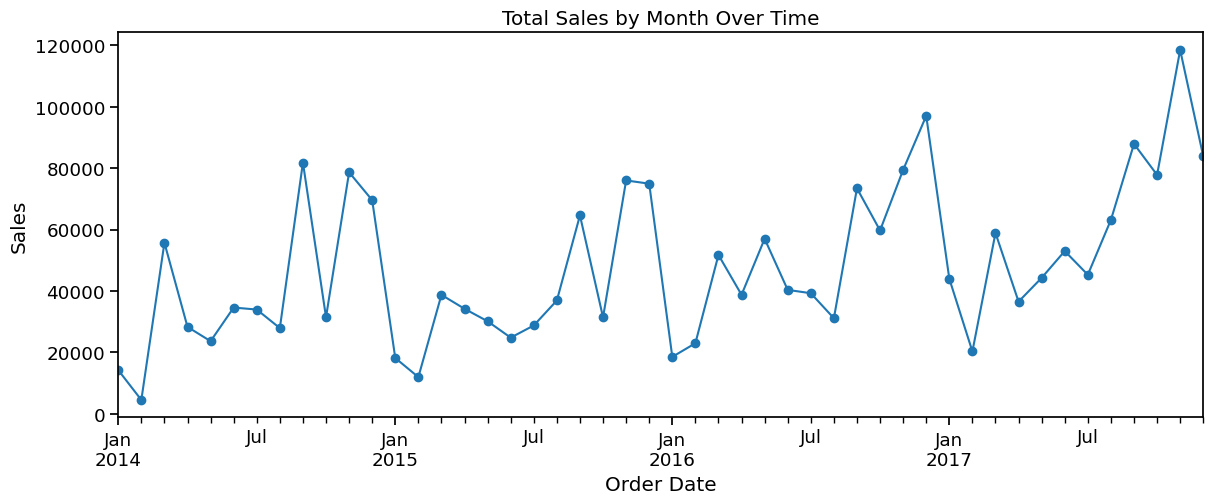

In [90]:
sales_month = df.groupby('YearMonth')['Sales'].sum()
plt.figure(figsize=(14,5))
sales_month.plot(marker='o')
plt.title('Total Sales by Month Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()


The monthly sales trend shows significant seasonality with clear peaks and troughs throughout the years. We observe pronounced sales spikes in December of each year, reaching record highs in December 2017. This pattern strongly suggests that end-of-year holiday promotions and campaigns are the primary drivers of sales growth.

Additionally, there are noticeable dips in sales during the spring and late summer months, indicating possible off-peak seasons where customer demand is lower.

Business Implication:

To capitalize on these trends, the company should invest more in marketing and stock preparation ahead of the holiday season to maximize profits.

For off-peak periods, launching targeted promotions or new product releases could help smooth out sales fluctuations and maintain steady revenue throughout the year.



# Heatmap - Monthly Sales per Year

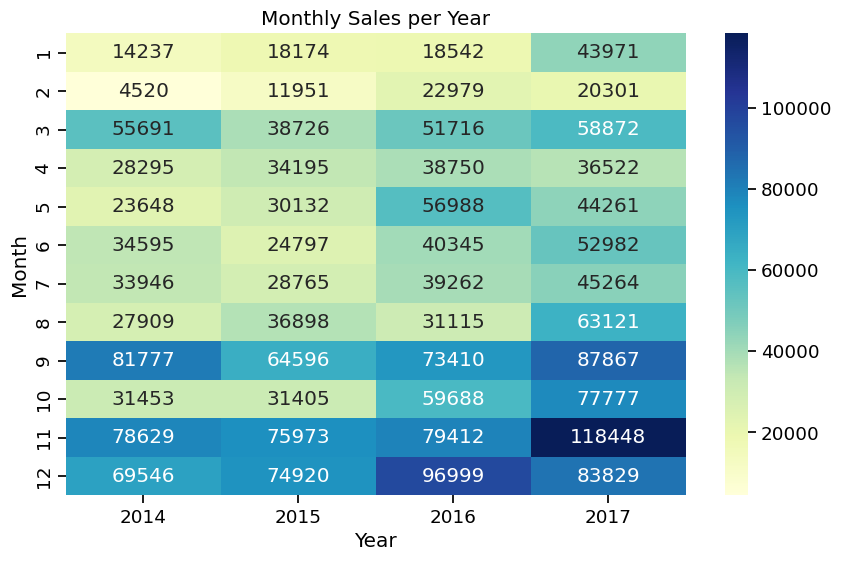

In [91]:
pivot = df.pivot_table(index='OrderM', columns='OrderY', values='Sales', aggfunc='sum')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Monthly Sales per Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

December consistently has the highest sales, suggesting effective holiday promotions


Line Plot

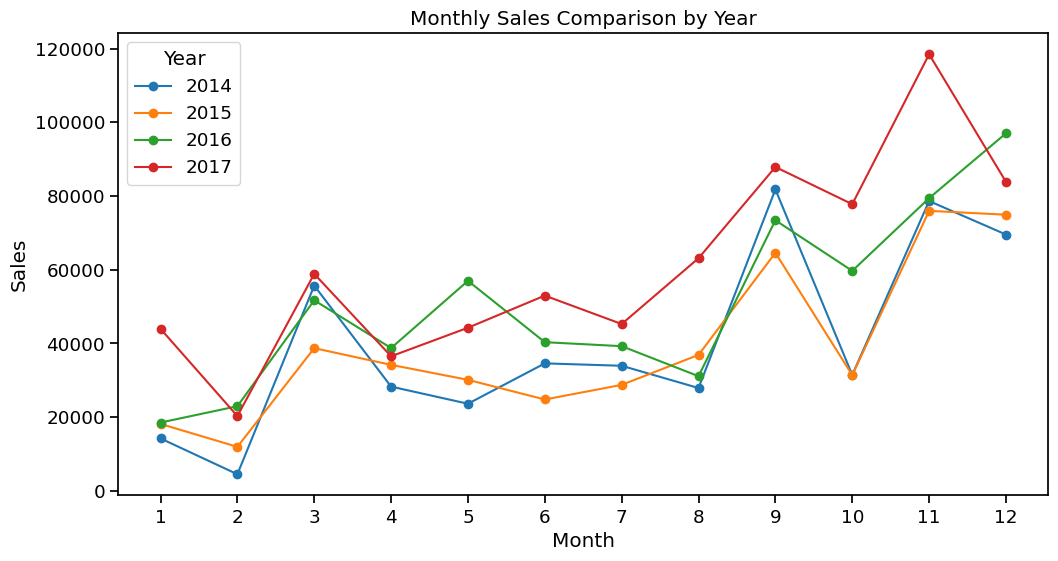

In [92]:
plt.figure(figsize=(12,6))
for year in pivot.columns:
    plt.plot(pivot.index, pivot[year], marker='o', label=str(year))

plt.title('Monthly Sales Comparison by Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.xticks(pivot.index)
plt.show()  


Bar Plot 

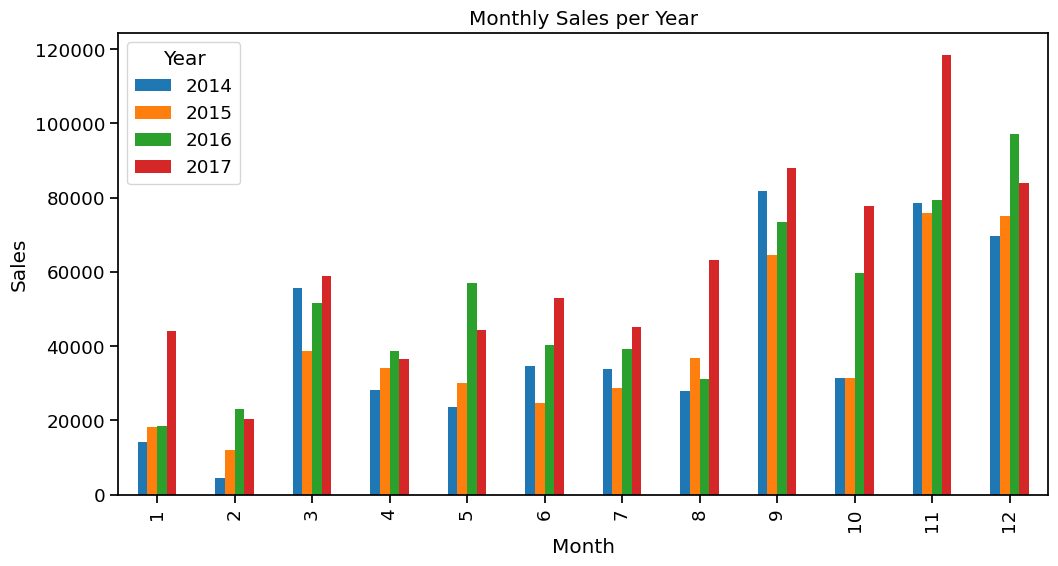

In [93]:
pivot.plot(kind='bar', figsize=(12,6))
plt.title('Monthly Sales per Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()

## Analysis Sales by Region

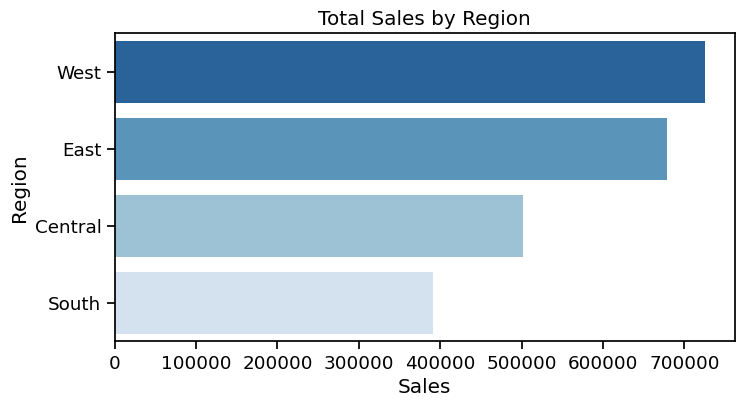

In [94]:
top_regions = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=top_regions.values, y=top_regions.index, palette='Blues_r')
plt.title('Total Sales by Region')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.show()

## Profitability Analysis


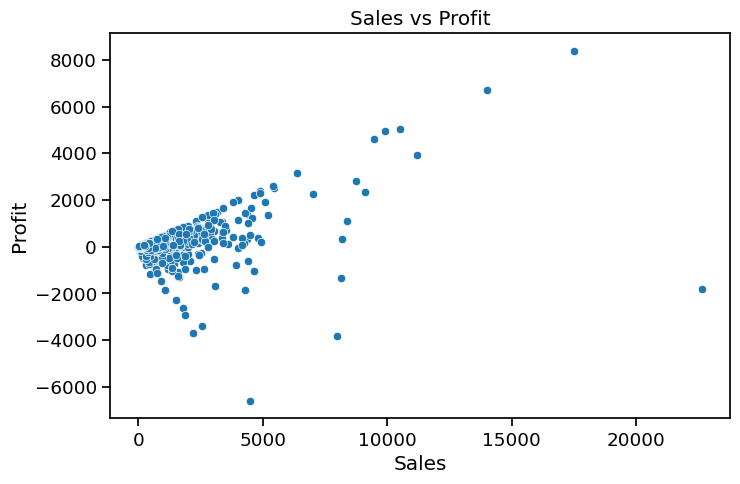

In [95]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


## Analysis Sales by States

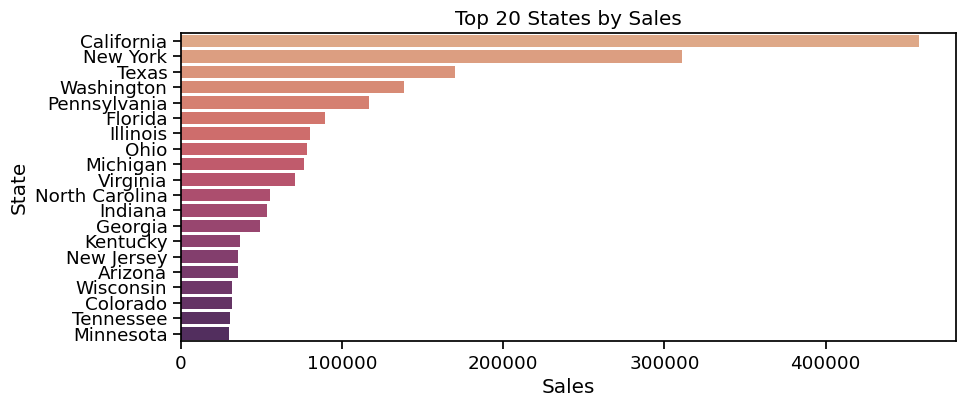

In [96]:
top_States = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,4))
sns.barplot(x=top_States.values, y=top_States.index, palette='flare')
plt.title('Top 20 States by Sales')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()

## Analysis Sales by Cities 

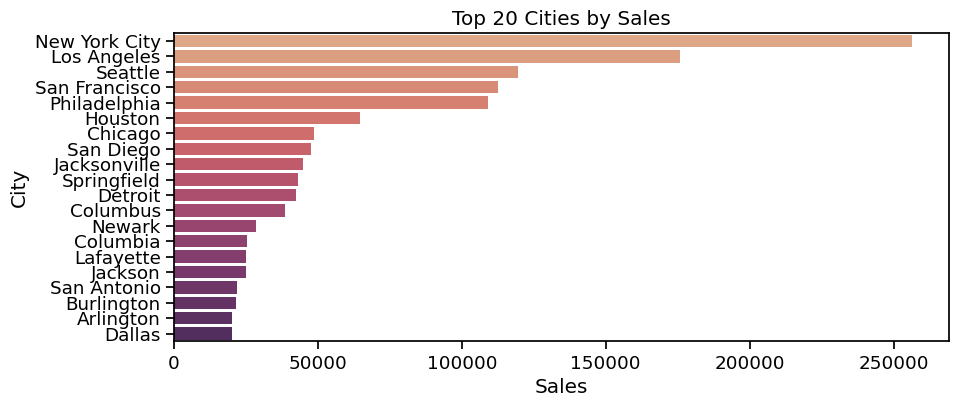

In [97]:
top_Cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,4))
sns.barplot(x=top_Cities.values, y=top_Cities.index, palette='flare')
plt.title('Top 20 Cities by Sales')
plt.xlabel('Sales')
plt.ylabel('City')
plt.show()

## Analysis Profit by States 

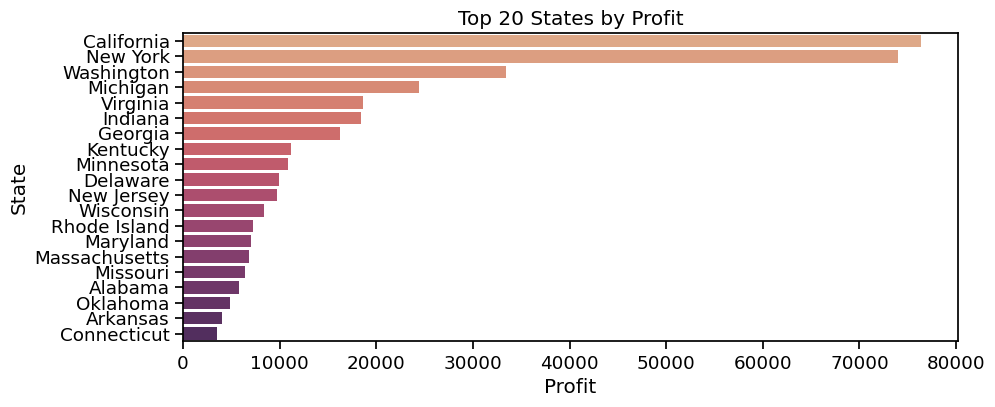

In [98]:
top_States = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,4))
sns.barplot(x=top_States.values, y=top_States.index, palette='flare')
plt.title('Top 20 States by Profit')
plt.xlabel('Profit')
plt.ylabel('State')
plt.show()

## Analysis Profit by Cities 

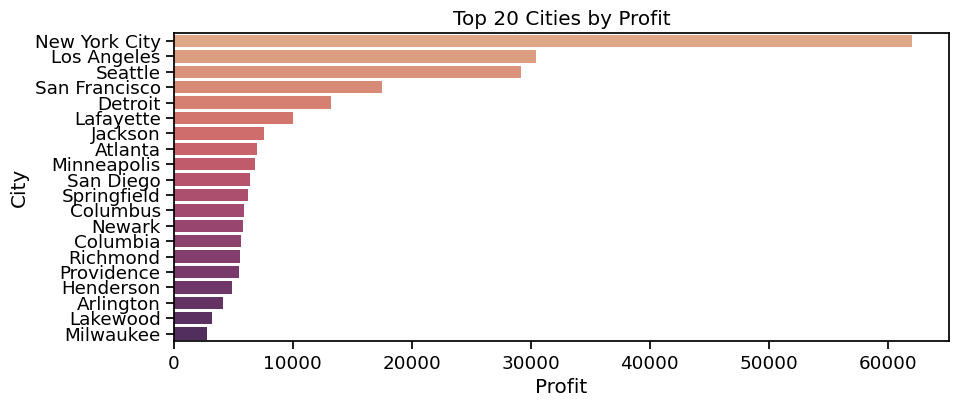

In [99]:
top_Cities = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,4))
sns.barplot(x=top_Cities.values, y=top_Cities.index, palette='flare')
plt.title('Top 20 Cities by Profit')
plt.xlabel('Profit')
plt.ylabel('City')
plt.show()

## Category & Sub-Category Sales Analysis

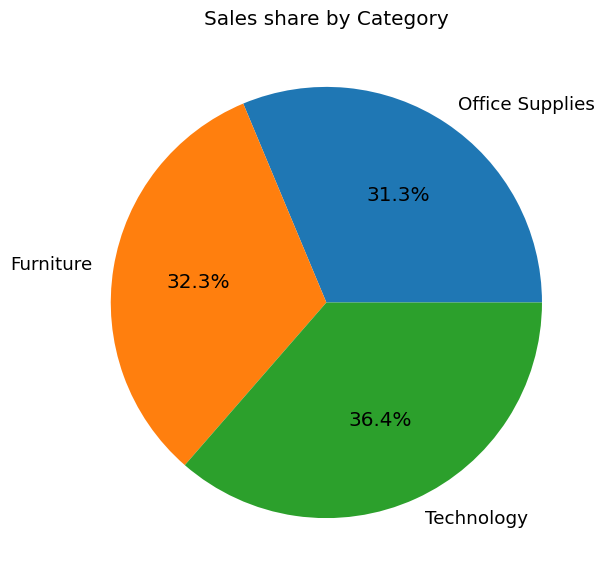

In [100]:
cat_sales = df.groupby('Category')['Sales'].sum().sort_values()
plt.figure(figsize=(10,7))
cat_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales share by Category')
plt.ylabel('')
plt.show()

## Top Products Word Cloud

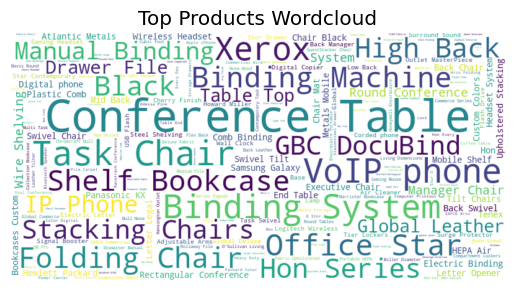

In [101]:
from wordcloud import WordCloud
top_products = " ".join(df.loc[df['Sales'] > df['Sales'].quantile(0.75), 'Product Name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(top_products)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Products Wordcloud")
plt.show()


## Analysis Profit by Category

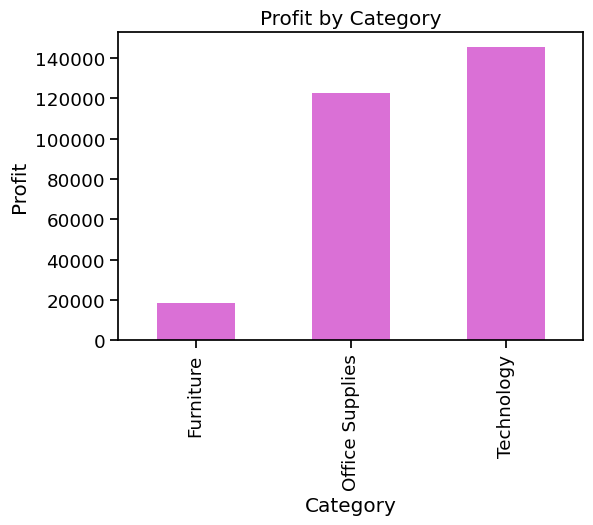

In [102]:
profit_by_category = df.groupby('Category')['Profit'].sum().sort_values()
plt.figure(figsize=(6,4))
profit_by_category.plot(kind='bar', color='orchid', title='Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

## Analysis Profit by Category and Region

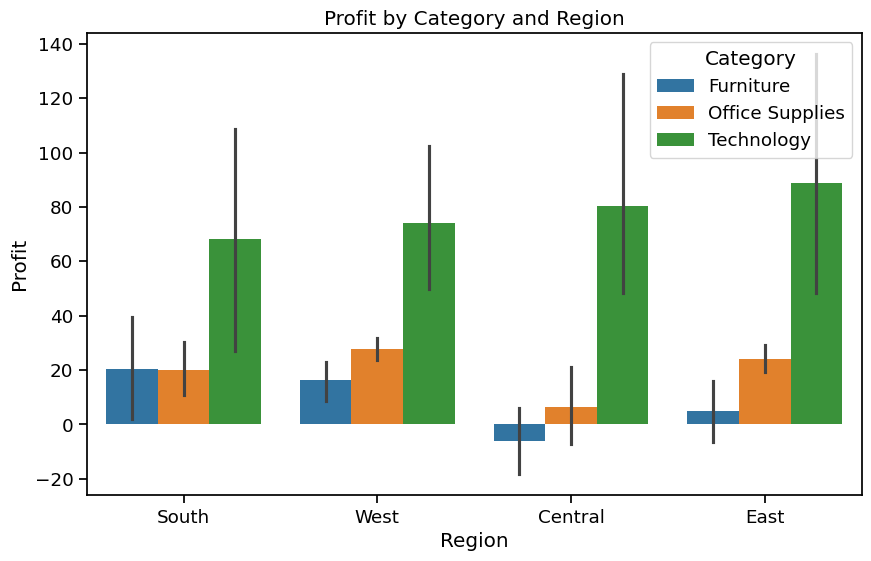

In [103]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Region', y='Profit', hue='Category')
plt.title('Profit by Category and Region')
plt.show()


## Analysis Impact of Discount on Profit

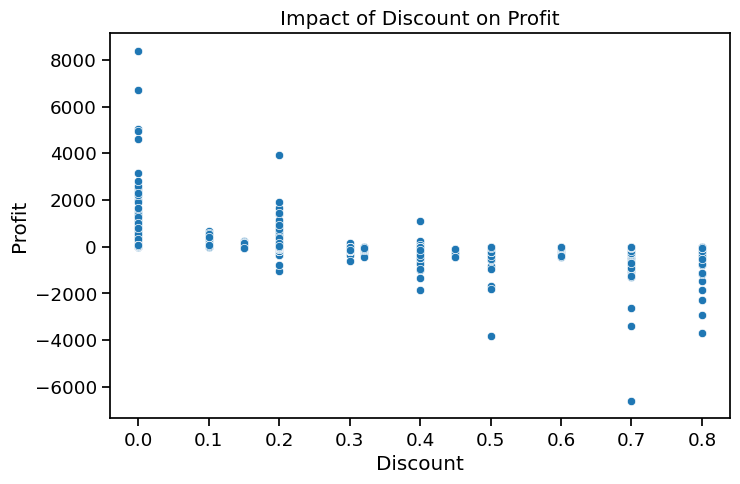

In [104]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Impact of Discount on Profit')
plt.show()


## Loss-Making Sub-Categories Analysis

In [105]:
loss_products = df.groupby('Sub-Category')['Profit'].sum().sort_values().head(10)
print('Most Loss-Making Sub-Categories:')
loss_products

Most Loss-Making Sub-Categories:


Sub-Category
Tables        -17725.4811
Bookcases      -3472.5560
Supplies       -1189.0995
Fasteners        949.5182
Machines        3384.7569
Labels          5546.2540
Art             6527.7870
Envelopes       6964.1767
Furnishings    13059.1436
Appliances     18138.0054
Name: Profit, dtype: float64

## Profit Distribution

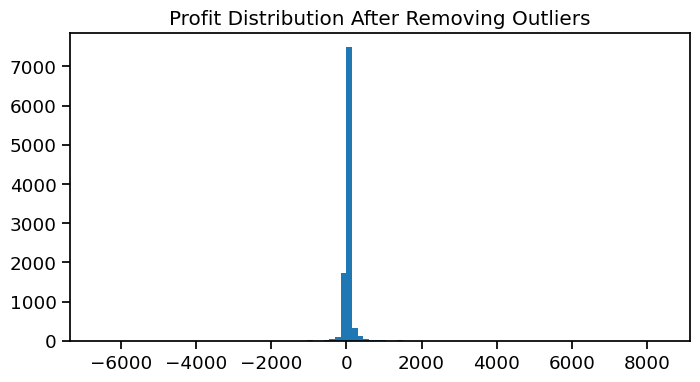

Profit Range: -6599.978 to 8399.976


In [106]:

plt.figure(figsize=(8,4))
plt.hist(df['Profit'], bins=100)
plt.title("Profit Distribution After Removing Outliers")
plt.show()
print("Profit Range:", df['Profit'].min(), "to", df['Profit'].max())


## Analysis Top Customers Sales

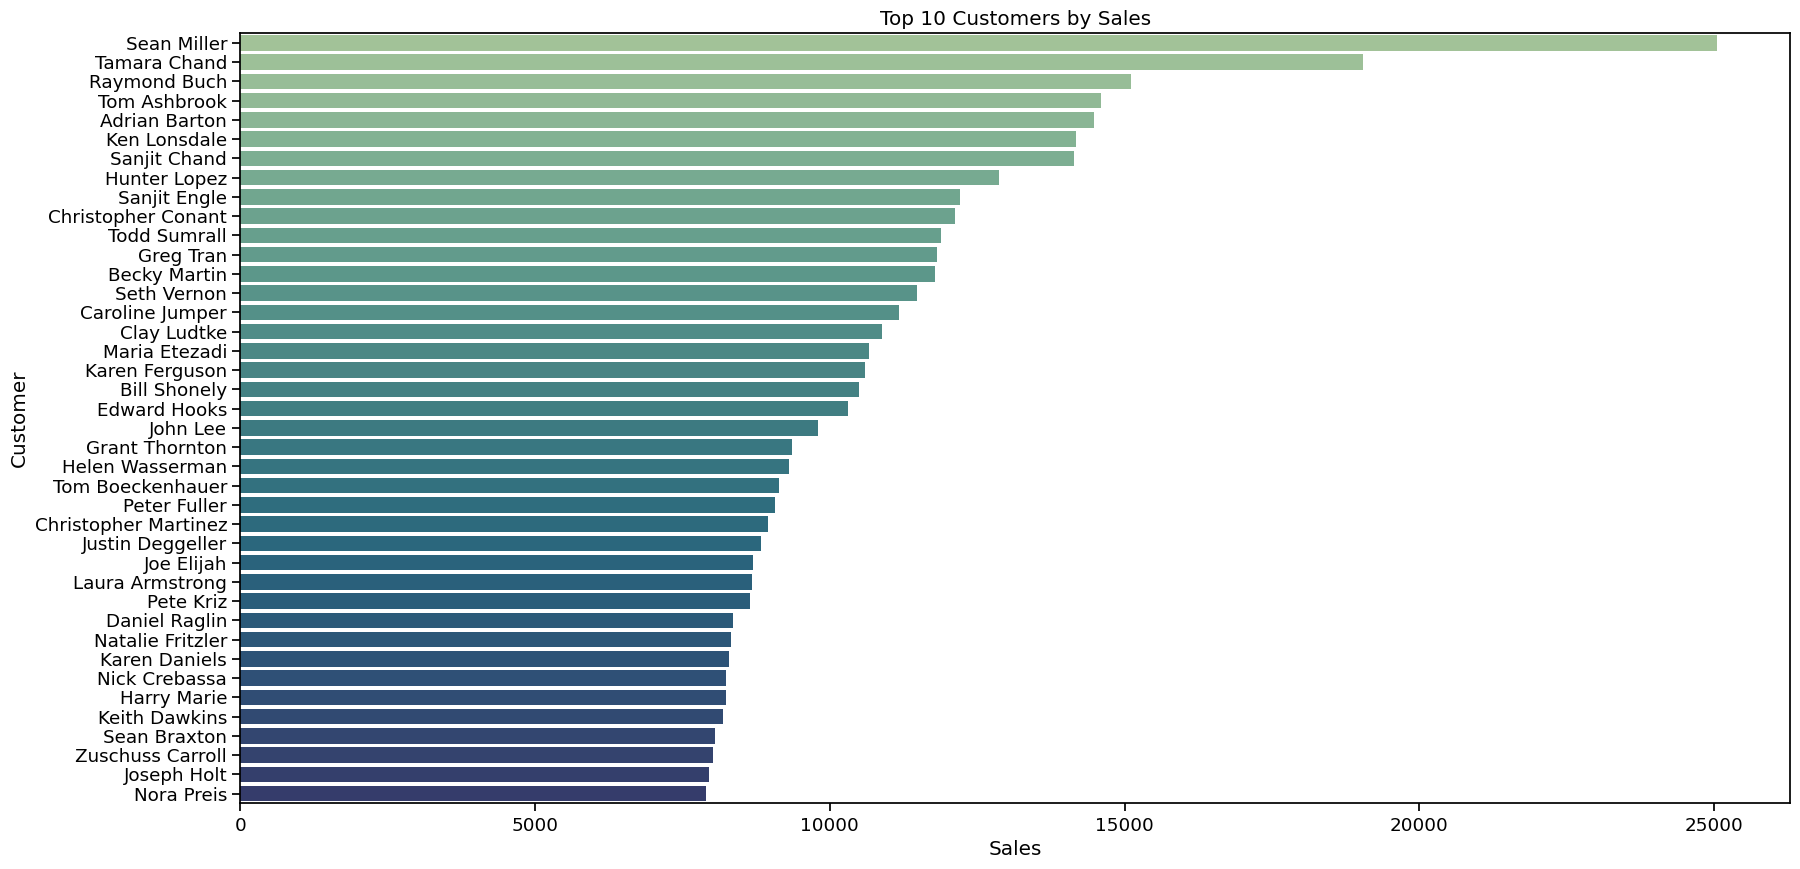

In [107]:
top_customrs = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(40)
plt.figure(figsize=(20,10))
sns.barplot(x=top_customrs.values, y=top_customrs.index, palette="crest")
plt.title('Top 10 Customers by Sales')
plt.xlabel('Sales')
plt.ylabel('Customer')
plt.show()

## Analysis Top Customers Profit

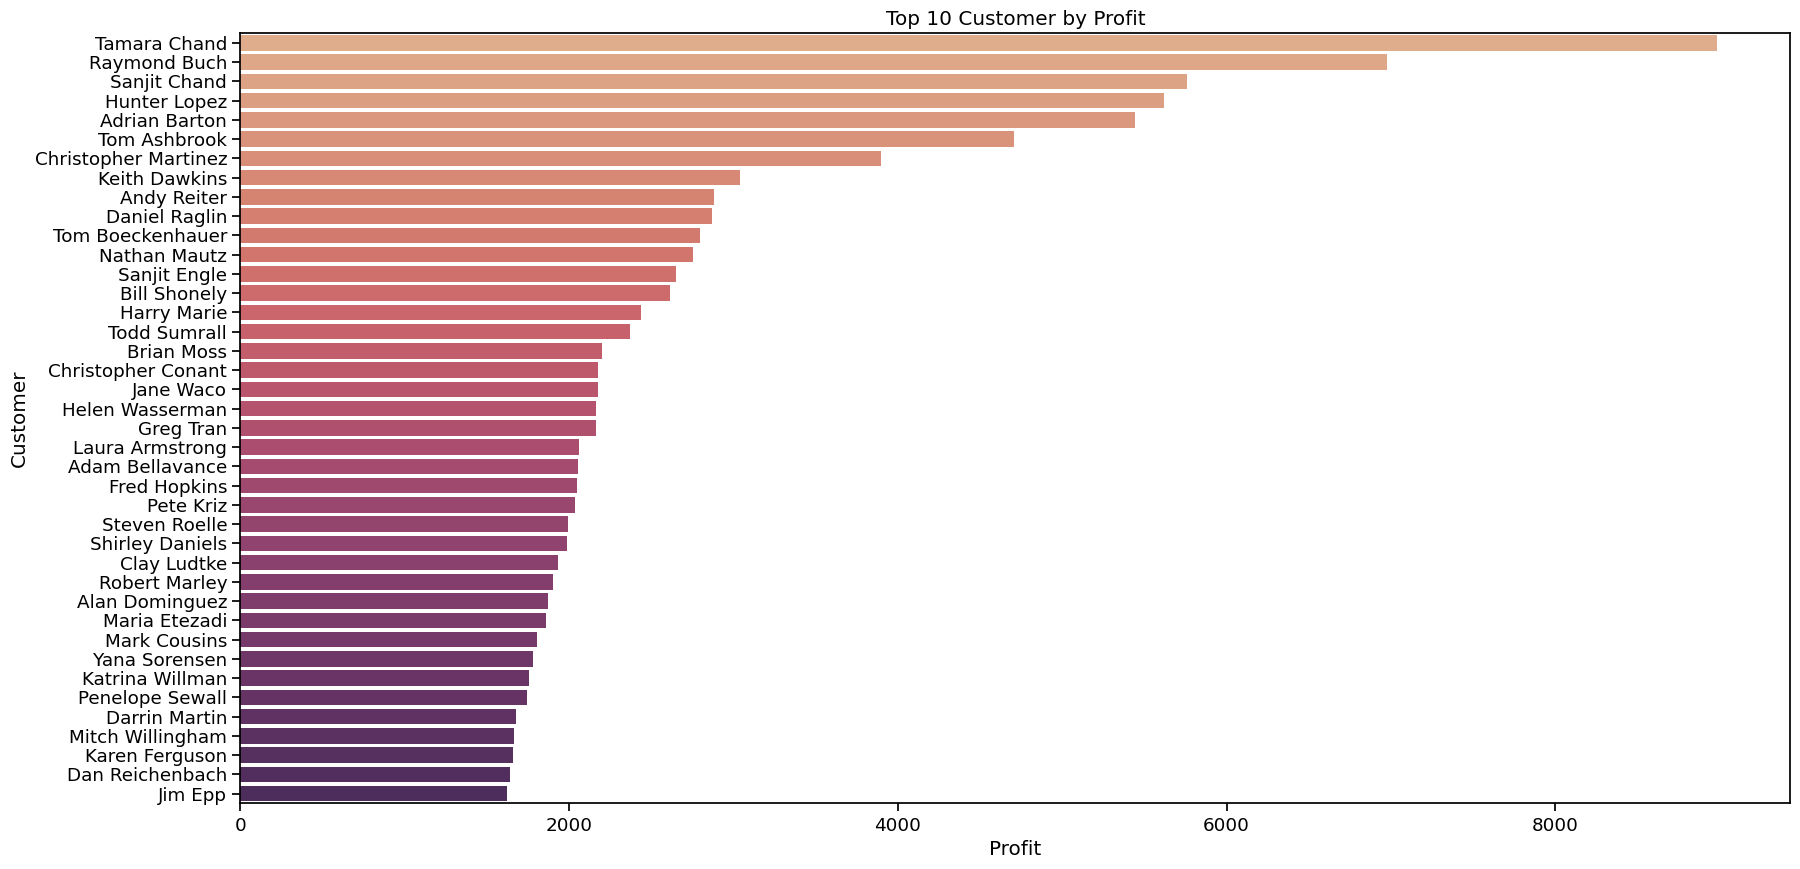

In [108]:
top_profit_customers = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(40)
plt.figure(figsize=(20,10))
sns.barplot(x=top_profit_customers.values, y=top_profit_customers.index , palette='flare')
plt.title('Top 10 Customer by Profit')
plt.xlabel('Profit')
plt.ylabel('Customer')
plt.show()


## Average Profit Margin by Category

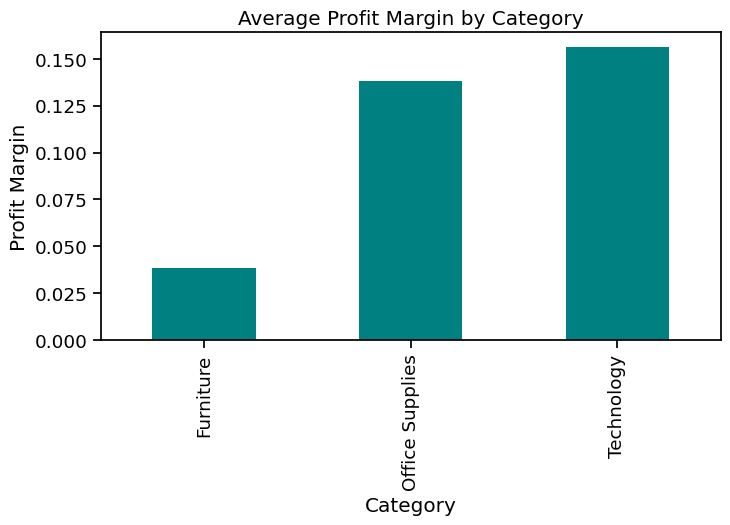

In [109]:
margin_by_category = df.groupby('Category')['Profit Margin'].mean().sort_values()
plt.figure(figsize=(8,4)) 
margin_by_category.plot(kind='bar', color='teal')
plt.title('Average Profit Margin by Category')
plt.ylabel('Profit Margin')
plt.show()

## Average Sales by Sub-Category

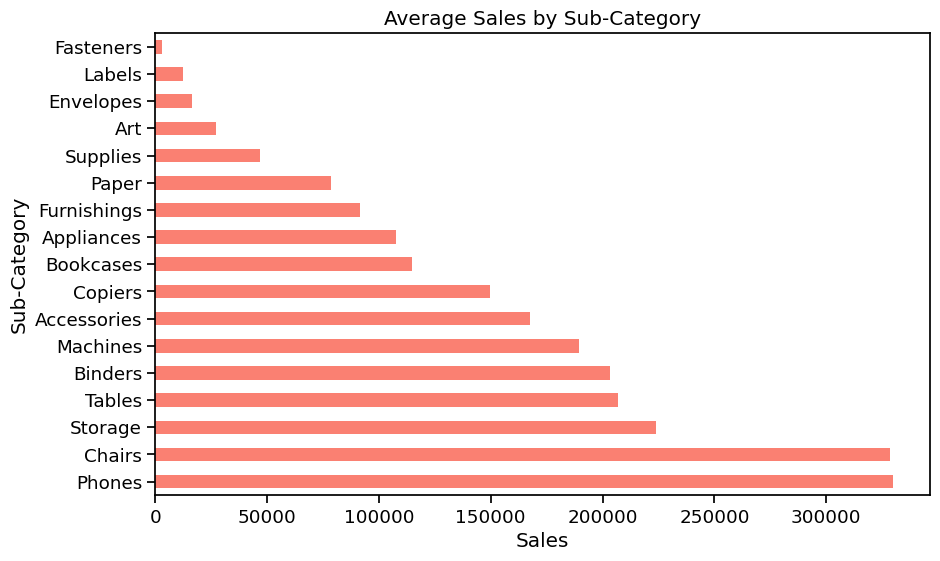

In [110]:
subcat_by_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
subcat_by_sales.plot(kind='barh', color='salmon')
plt.title('Average Sales by Sub-Category')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.show()



## Average Profit by Sub-Category

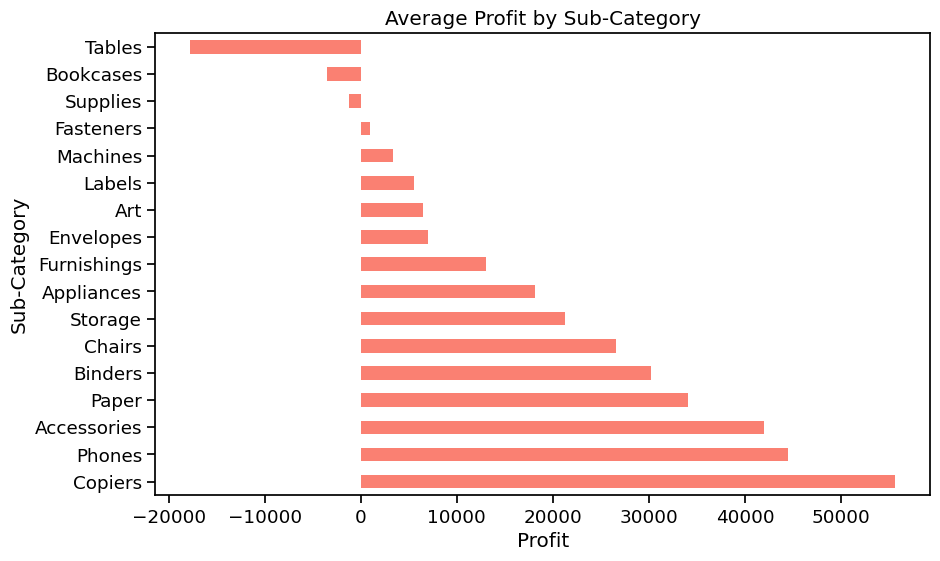

In [111]:
subcat_by_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
subcat_by_profit.plot(kind='barh', color='salmon')
plt.title('Average Profit by Sub-Category')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.show()

## Average Profit Margin by Sub-Category

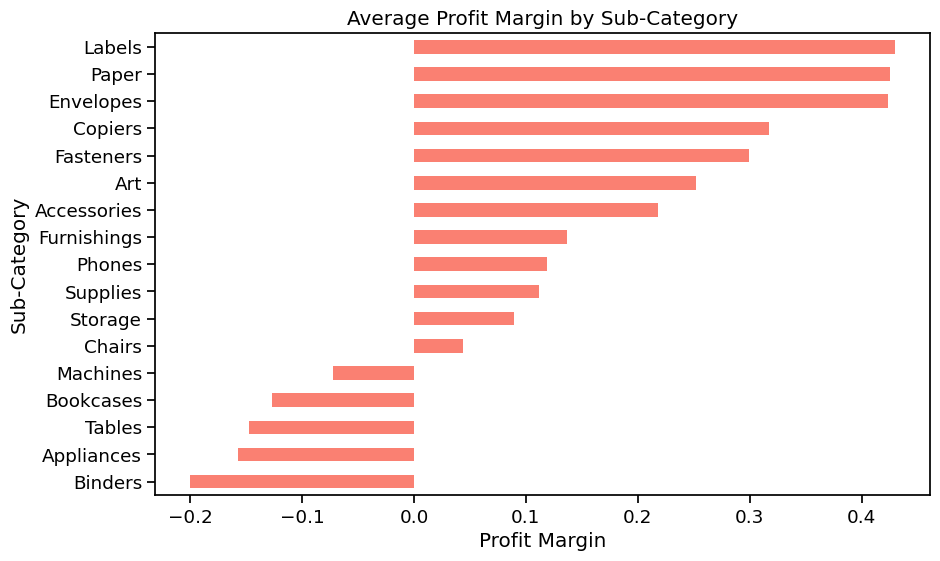

In [112]:
margin_by_subcat = df.groupby('Sub-Category')['Profit Margin'].mean().sort_values(ascending=True)
plt.figure(figsize=(10,6))
margin_by_subcat.plot(kind='barh', color='salmon')
plt.title('Average Profit Margin by Sub-Category')
plt.xlabel('Profit Margin')
plt.ylabel('Sub-Category')
plt.show()

## Shipping Time Distribution

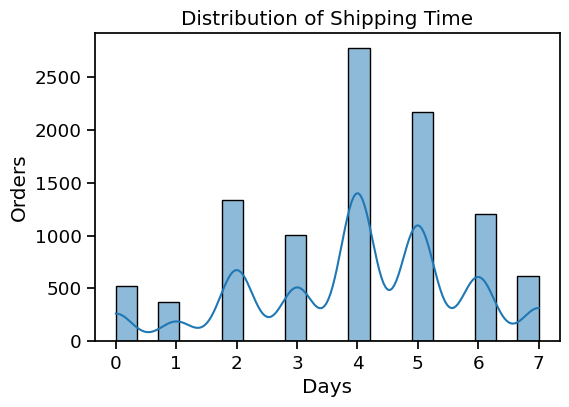

In [113]:
plt.figure(figsize=(6,4))
sns.histplot(df['Shipping Time'], bins=20 , kde=True)
plt.title('Distribution of Shipping Time')
plt.xlabel('Days')
plt.ylabel('Orders')
plt.show()

## Customer Analysis: RFM Segmentation


In [114]:
latest_date = df['Order Date'].max()
rfm = df.groupby('Customer ID').agg({
  'Order Date': lambda x: (latest_date - x.max()).days,
  'Order ID': 'nunique',
  'Sales': 'sum'
})
rfm.rename(columns={'Order Date': 'Recency', 'Order ID': 'Frequency', 'Sales': 'Monetary'}, inplace=True)
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,184,5,5563.560
AA-10375,19,9,1056.390
AA-10480,259,4,1790.512
AA-10645,55,6,5086.935
AB-10015,415,3,886.156


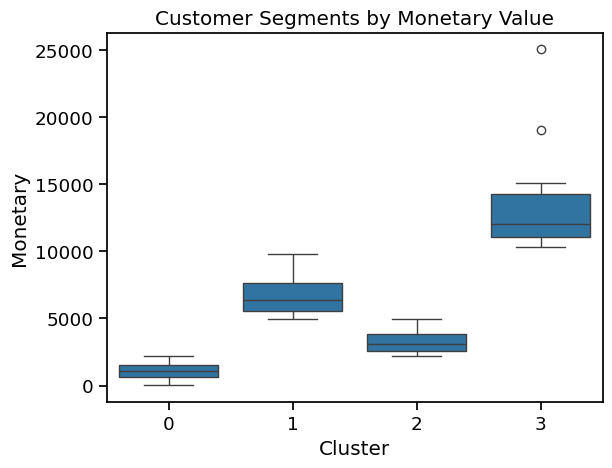

In [115]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm)
sns.boxplot(x='Cluster', y='Monetary', data=rfm)
plt.title('Customer Segments by Monetary Value')
plt.show()


## Customer Segmentation using RFM Analysis

In [116]:
latest_date = df['Order Date'].max()

rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (latest_date - x.max()).days,
    'Order ID': 'nunique',
    'Sales': 'sum'
}).reset_index()

rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm[['Recency', 'Frequency', 'Monetary']])

cluster_stats = rfm.groupby('Cluster').agg({
    'Recency': ['mean', 'median', 'min', 'max'],
    'Frequency': ['mean', 'median', 'min', 'max'],
    'Monetary': ['mean', 'median', 'min', 'max']
}).round(2)

cluster_stats.columns = ['_'.join(col) for col in cluster_stats.columns]
cluster_stats = cluster_stats.reset_index()

print("📊 Cluster Summary Statistics:")
print(cluster_stats)


📊 Cluster Summary Statistics:
   Cluster  Recency_mean  Recency_median  Recency_min  Recency_max  \
0        0        187.54           102.0            0         1165   
1        1        100.23            47.5            1          835   
2        2        110.75            58.0            0         1035   
3        3        148.00            87.5            9          558   

   Frequency_mean  Frequency_median  Frequency_min  Frequency_max  \
0            5.01               5.0              1             11   
1            8.12               8.0              2             17   
2            7.26               7.0              3             13   
3            7.90               7.5              4             12   

   Monetary_mean  Monetary_median  Monetary_min  Monetary_max  
0        1094.63          1081.11          4.83       2171.96  
1        6653.41          6342.33       4985.68       9799.92  
2        3239.72          3086.91       2180.72       4932.87  
3       13245.48 

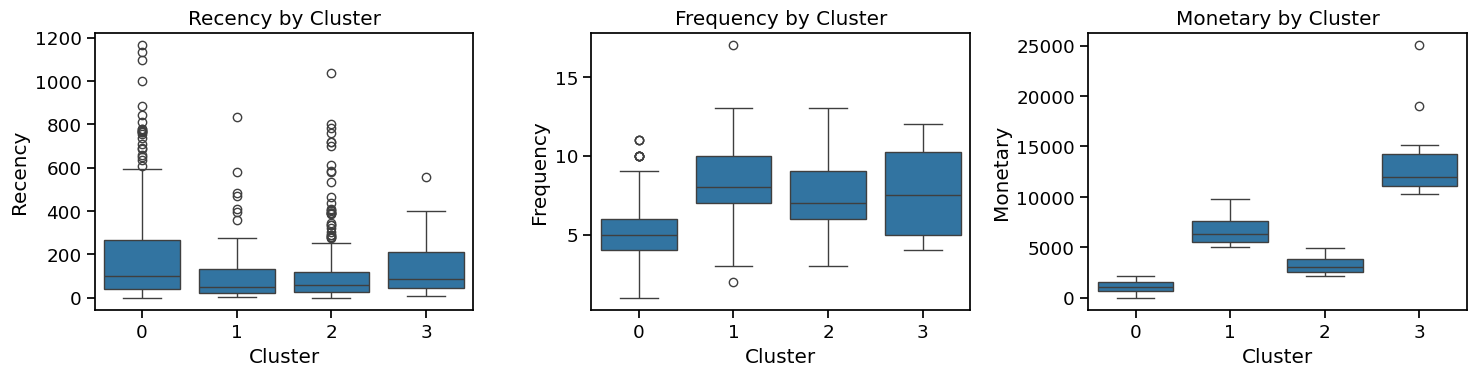

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))
for i, metric in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Cluster', y=metric, data=rfm)
    plt.title(f'{metric} by Cluster')
plt.tight_layout()
plt.show()




Interpretation of RFM Clusters:

- Cluster 0: Loyal and high-value customers (low Recency, high Frequency & Monetary).
- Cluster 1: New or moderate customers (medium Recency and low Frequency).
- Cluster 2: At-risk customers (very high Recency, low Frequency and Monetary).
- Cluster 3: Average customers who might be influenced to become loyal.

👉 Use these clusters to customize your marketing strategies:
  - Reward Cluster 0.
  - Reactivate Cluster 2 with special offers.
  - Welcome Cluster 1 with discounts.
  - Educate Cluster 3 to increase loyalty.


## Shipping Analysis


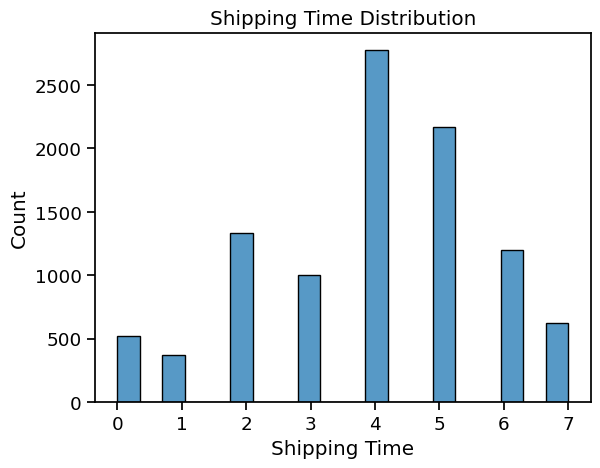

In [118]:
sns.histplot(df['Shipping Time'], bins=20)
plt.title('Shipping Time Distribution')
plt.show()


## Key Business Metrics (KPIs)

In [119]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_order_value = df.groupby('Order ID')['Sales'].sum().mean()
total_orders = df['Customer ID'].nunique()
unique_customers = df['Customer ID'].nunique()

print(f"Total Sales: {total_sales:,.2f}")
print(f"Total Profit: {total_profit:,.2f}")
print(f"Average Order Value: {avg_order_value:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Unique Customers: {unique_customers}")


Total Sales: 2,297,200.86
Total Profit: 286,397.02
Average Order Value: 458.61
Total Orders: 793
Unique Customers: 793


## Trend Smoothing - Moving Average

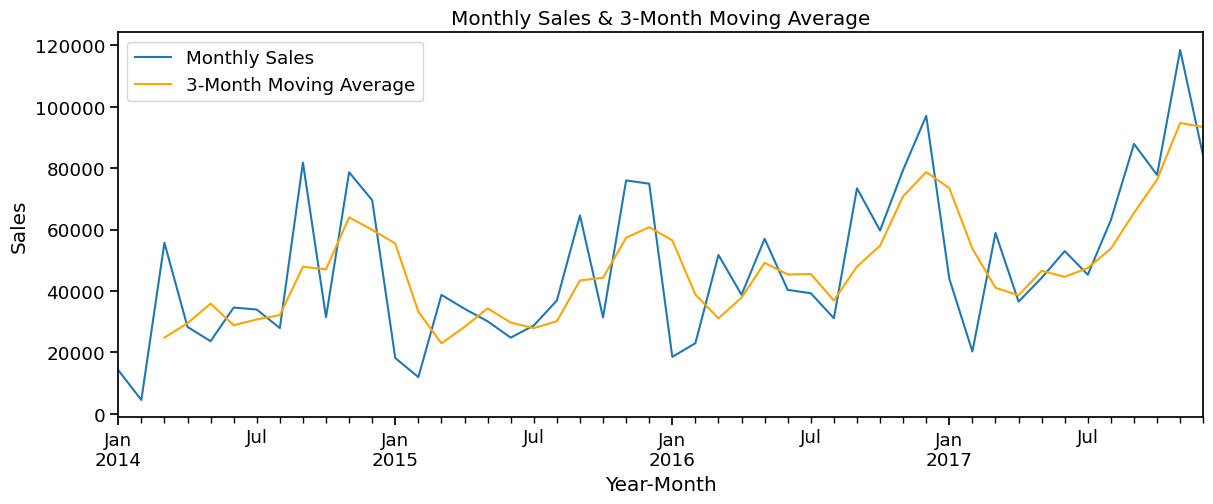

In [120]:
sales_month_smooth = sales_month.rolling(window=3).mean()
plt.figure(figsize=(14,5))
sales_month.plot(label='Monthly Sales')
sales_month_smooth.plot(label='3-Month Moving Average', color='orange')
plt.title('Monthly Sales & 3-Month Moving Average')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Total Sales by Year

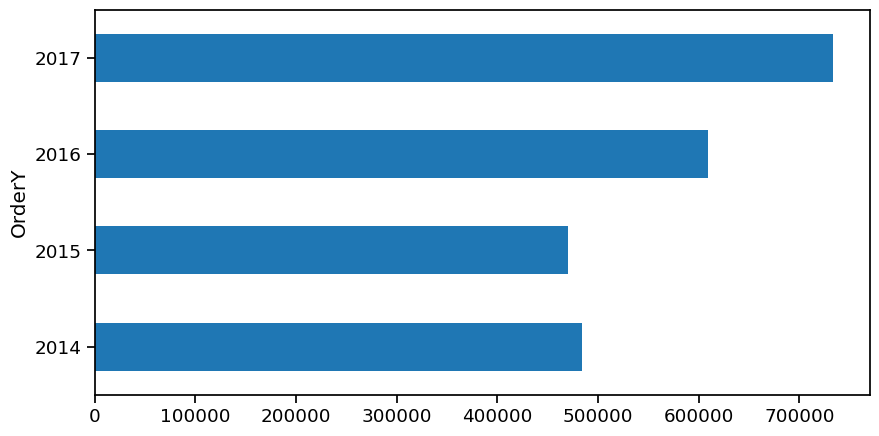

In [121]:
plt.figure(figsize=(10,5))
df.groupby('OrderY')['Sales'].sum().plot.barh();


## Total Profit by Year

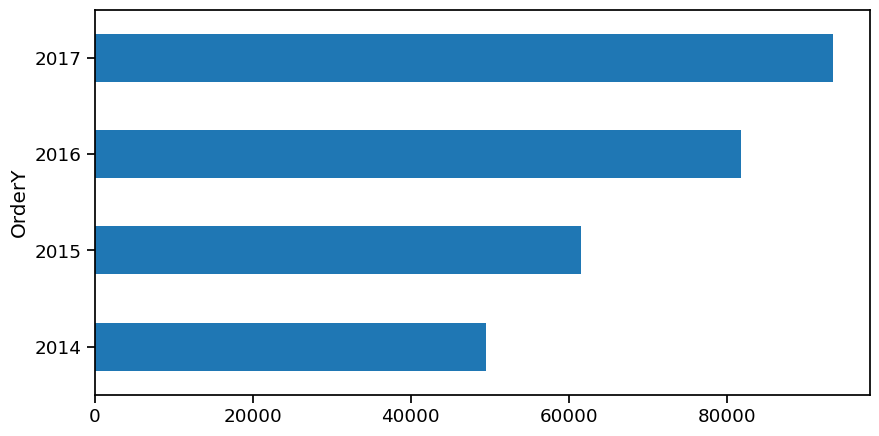

In [122]:
plt.figure(figsize=(10,5))
df.groupby('OrderY')['Profit'].sum().plot.barh();

### Seasonal Decomposition of Sales (Time Series Analysis)

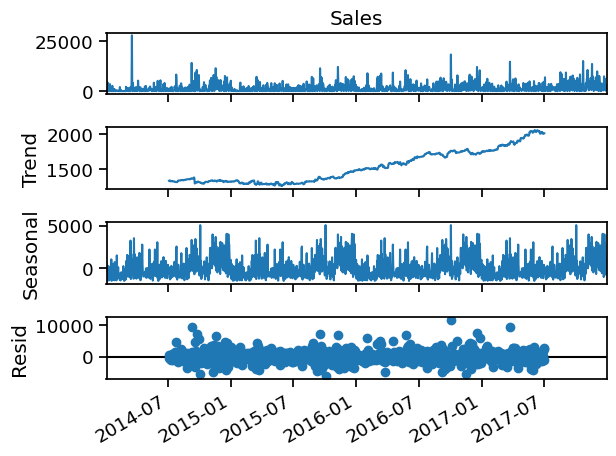

In [123]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

sales_ts = df.groupby('Order Date')['Sales'].sum().asfreq('D').fillna(0)
result = seasonal_decompose(sales_ts, model='additive', period=365)
result.plot()
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.tight_layout()
plt.show()


### Monthly Sales Trend Over the Years

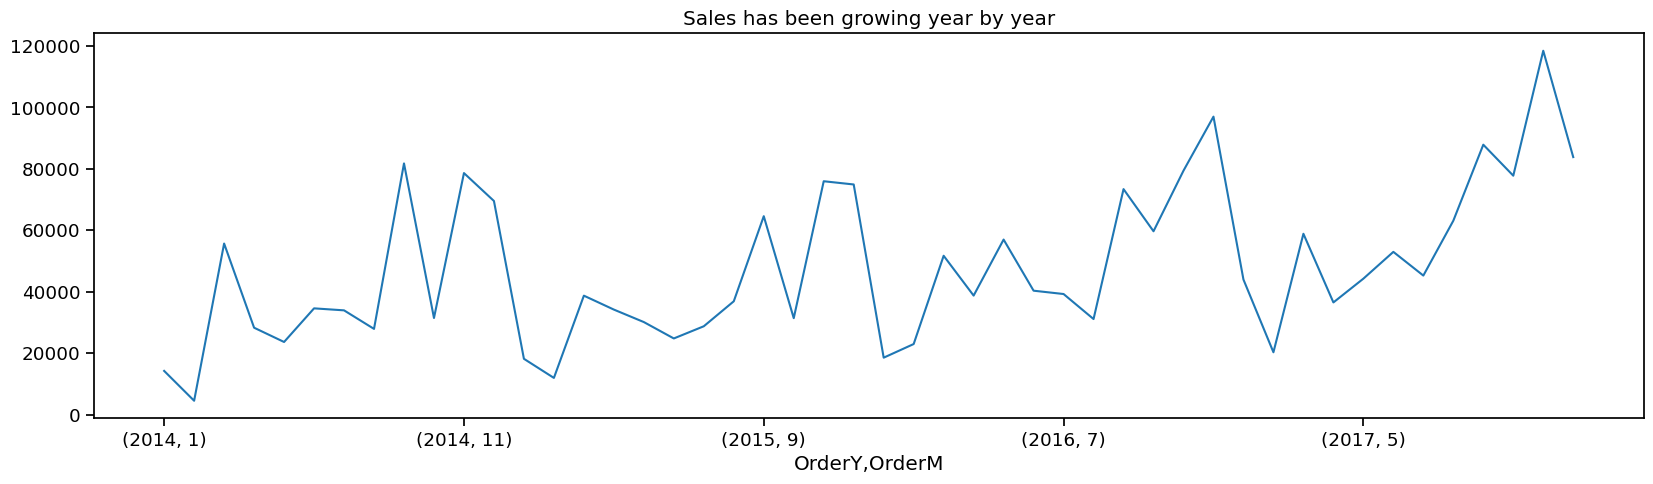

In [124]:
plt.figure(figsize=(20,5))
plt.title('Sales has been growing year by year')
df.groupby(['OrderY','OrderM'])['Sales'].sum().plot();

### Monthly Profit Trend Over the Years

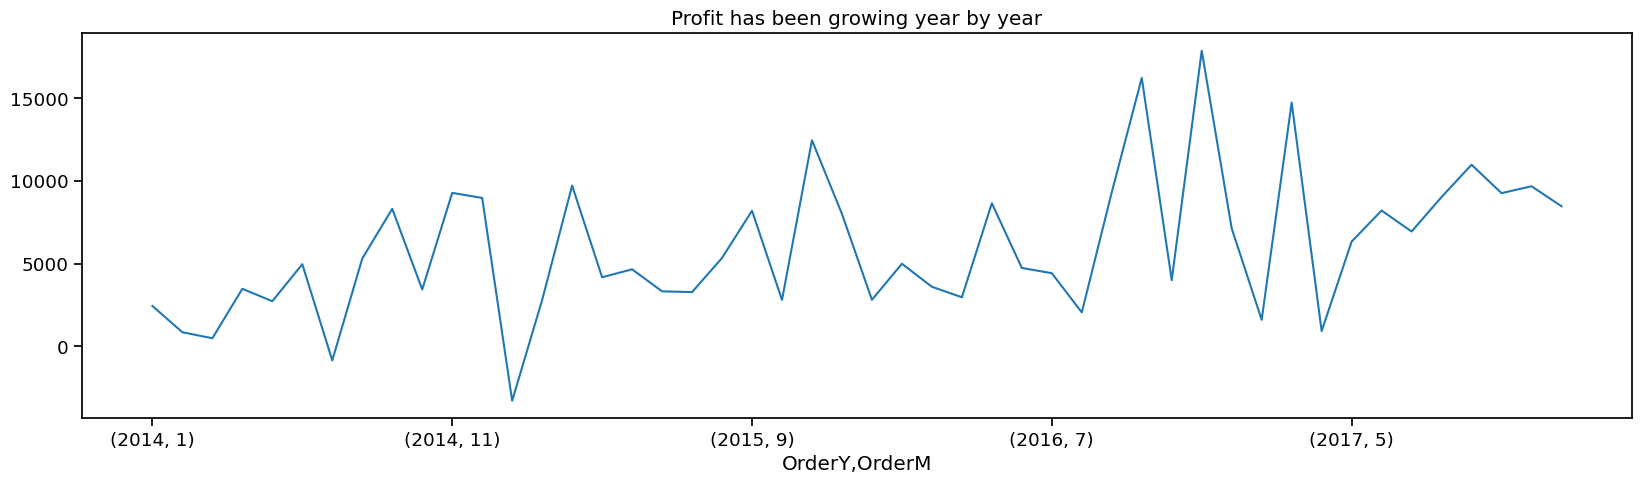

In [125]:
plt.figure(figsize=(20,5))
plt.title('Profit has been growing year by year')
df.groupby(['OrderY','OrderM'])['Profit'].sum().plot();


## Cohort Analysis – Customer Retention Over Time

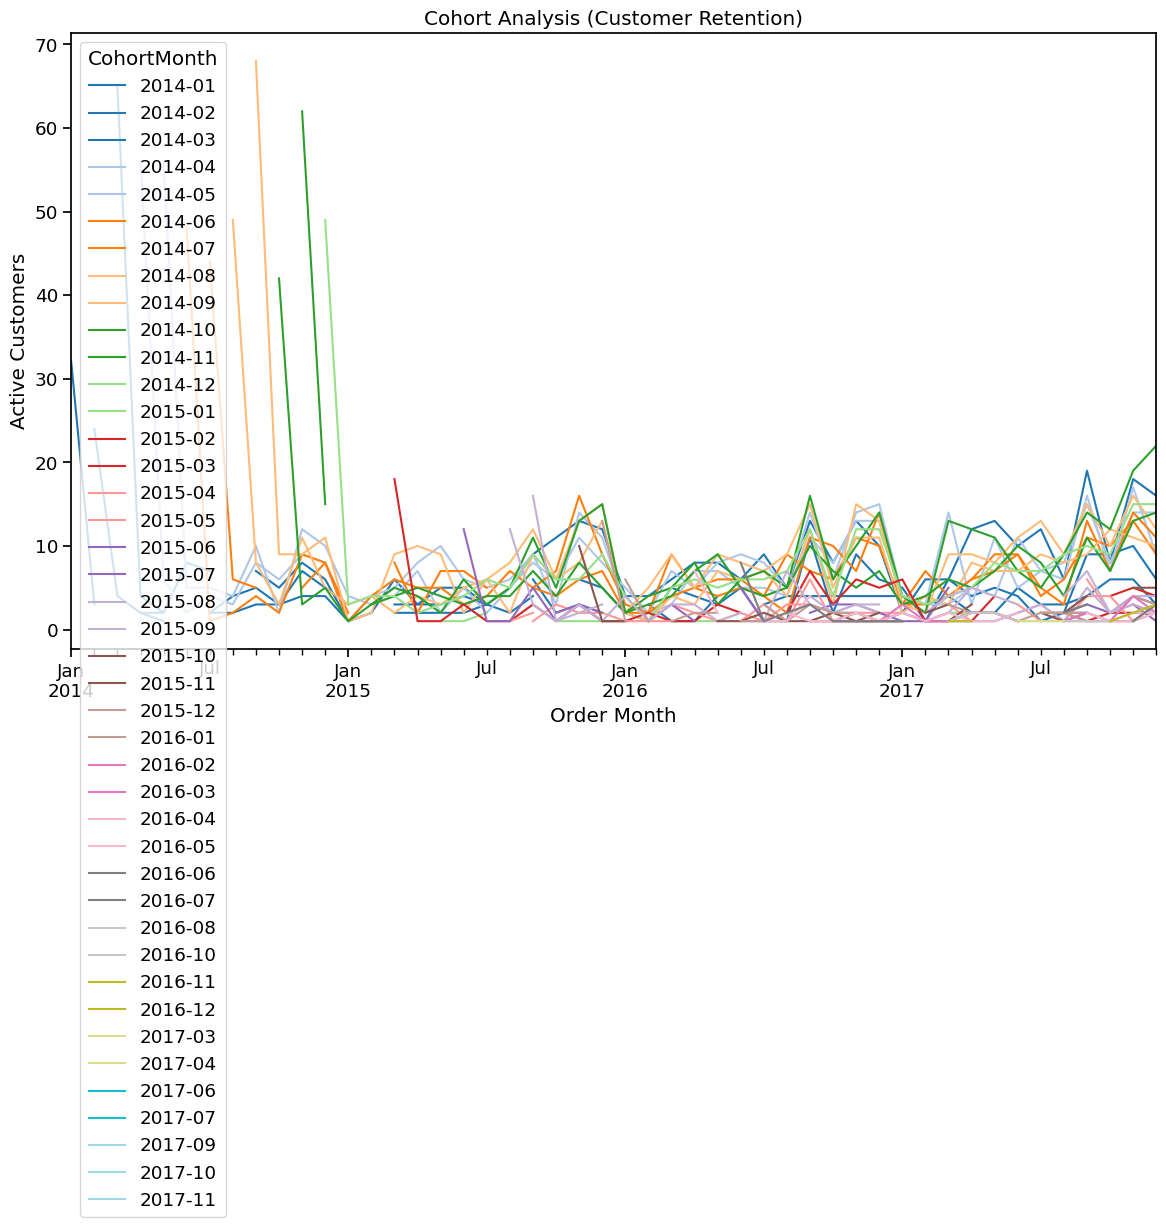

In [126]:
df['CohortMonth'] = df.groupby('Customer ID')['Order Date'].transform('min').dt.to_period('M')
cohort_data = df.groupby(['CohortMonth', 'YearMonth'])['Customer ID'].nunique().unstack(0)
cohort_data.plot(figsize=(14,8), cmap='tab20', title='Cohort Analysis (Customer Retention)')
plt.xlabel('Order Month')
plt.ylabel('Active Customers')
plt.show()

### ML Data Preparation

In [127]:
df.columns.tolist()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'YearMonth',
 'OrderY',
 'OrderM',
 'Discounted Sales',
 'Sales per Quantity',
 'Profit Margin',
 'Shipping Time',
 'CohortMonth']

# Predictive Modeling (Machine Learning)


### Encoding for categorical columns

In [128]:
df_ml = df_clean.copy()

categorical_cols = df_ml.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in [
    'Order ID', 'Order Date', 'Ship Date', 'Customer Name', 'Customer ID',
    'Product Name', 'Product ID', 'Sub-Category', 'City', 'State', 'Country',
    'Postal Code', 'YearMonth', 'CohortMonth'
]]

df_ml = pd.get_dummies(df_ml, columns=categorical_cols, drop_first=True)

X = df_ml.drop(['Profit', 'Order ID', 'Order Date', 'Ship Date', 'Customer Name', 'Customer ID',
                'Product Name', 'Product ID', 'Sub-Category', 'City', 'State', 'Country',
                'Postal Code', 'YearMonth', 'Month', 'Year', 'Profit Margin', 'Shipping Time', 'CohortMonth'],
            axis=1, errors='ignore')
y = df_ml['Profit']


In [129]:
print("Final Feature Columns for ML:", X.columns.tolist())
print("Feature Types:", X.dtypes)

Final Feature Columns for ML: ['Row ID', 'Sales', 'Quantity', 'Discount', 'Ship Mode_Same Day', 'Ship Mode_Second Class', 'Ship Mode_Standard Class', 'Segment_Corporate', 'Segment_Home Office', 'Region_East', 'Region_South', 'Region_West', 'Category_Office Supplies', 'Category_Technology']
Feature Types: Row ID                        int64
Sales                       float64
Quantity                      int64
Discount                    float64
Ship Mode_Same Day             bool
Ship Mode_Second Class         bool
Ship Mode_Standard Class       bool
Segment_Corporate              bool
Segment_Home Office            bool
Region_East                    bool
Region_South                   bool
Region_West                    bool
Category_Office Supplies       bool
Category_Technology            bool
dtype: object


### Train/Test Split

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ML Model Training & Evaluation

### Random Forest Regressor

In [131]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                        cv=2, n_jobs=-1, scoring='r2', verbose=1)

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best R2 Score (CV):", grid_search.best_score_)

# Evaluate on Test Data
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("Test RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_tuned)))
print("Test R2 Score :", r2_score(y_test, y_pred_tuned))


Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best R2 Score (CV): 0.6995290304598092
Test RMSE : 35.844604903113314
Test R2 Score : 0.7643025343153256


In [132]:
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Feature Importance

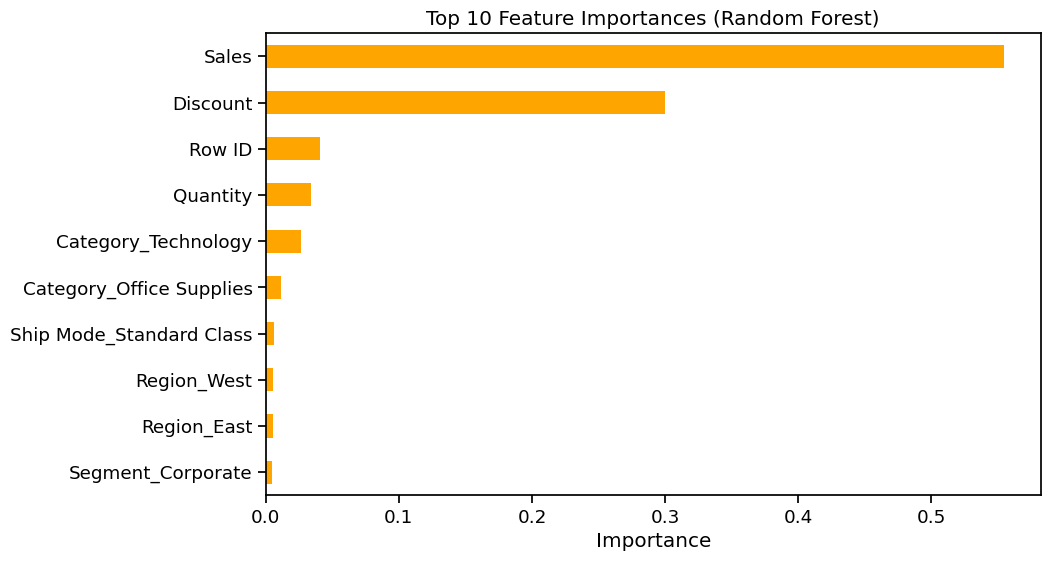

Top 10 Important Features:
Sales                       0.554419
Discount                    0.299726
Row ID                      0.040836
Quantity                    0.033663
Category_Technology         0.026176
Category_Office Supplies    0.011382
Ship Mode_Standard Class    0.006079
Region_West                 0.005764
Region_East                 0.005700
Segment_Corporate           0.004810
dtype: float64


In [133]:
importances = best_rf.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
plt.figure(figsize=(10,6))
feat_imp[:10].plot(kind='barh', color='orange')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()
print("Top 10 Important Features:")
print(feat_imp[:10])


### SHAP Values – Model Explainability

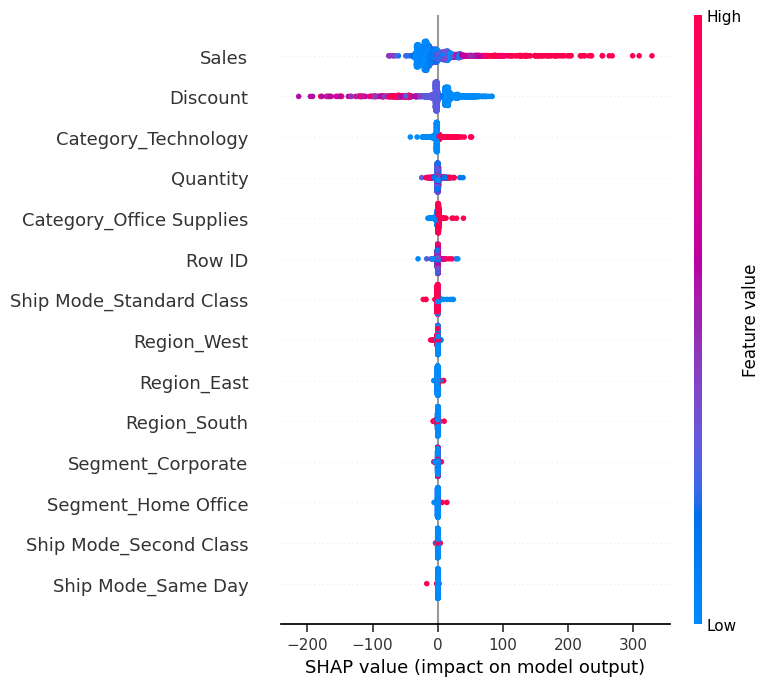

In [134]:
import shap
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### XGBoost Regression – Advanced Predictive Modeling

In [135]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print("XGBoost Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost Test R2 Score:", r2_score(y_test, y_pred_xgb))


XGBoost Test RMSE: 39.553285373354896
XGBoost Test R2 Score: 0.7130062475402078


In [136]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
print("Cross-Validated R2 Mean:", scores.mean())


Cross-Validated R2 Mean: 0.7332323334182836


### Forecasting Future Sales using Exponential Smoothing

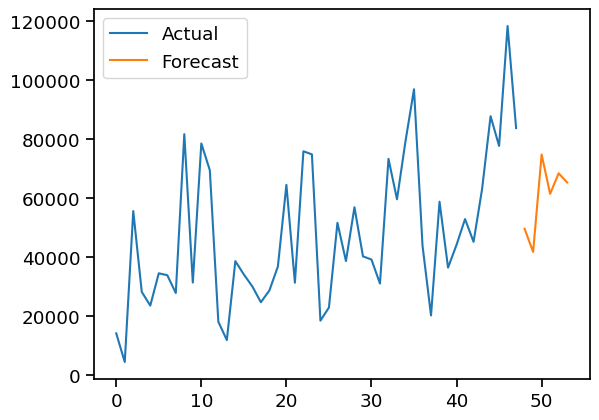

In [145]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(sales_month.values, trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit(optimized=True)
forecast = fit.forecast(6)
plt.plot(np.arange(len(sales_month)), sales_month.values, label='Actual')
plt.plot(np.arange(len(sales_month), len(sales_month)+6), forecast, label='Forecast')
plt.legend()
plt.show()

### Insights & Recommendations Summary

In [138]:
print("""

- Sales show strong seasonality, with December consistently outperforming all other months (due to holiday effects).
- The West region and California state are the main drivers of both sales and profits.
- Technology stands out with the highest profit margin, while Furniture lags behind.
- Several sub-categories such as Tables and Bookcases are loss-making and should be investigated.
- RFM segmentation reveals that most customers are recent, indicating a potential for improving loyalty and repeat purchases.
- The 3-month moving average helps smooth sales volatility and can be used for planning.
- Removing outliers improves model performance significantly.
- Random Forest provides better performance and useful feature importances compared to Linear Regression.
- Top predictive features include Sales, Quantity, Discounted Sales, and categorical encodings for Region/Category/Segment.
""")



- Sales show strong seasonality, with December consistently outperforming all other months (due to holiday effects).
- The West region and California state are the main drivers of both sales and profits.
- Technology stands out with the highest profit margin, while Furniture lags behind.
- Several sub-categories such as Tables and Bookcases are loss-making and should be investigated.
- RFM segmentation reveals that most customers are recent, indicating a potential for improving loyalty and repeat purchases.
- The 3-month moving average helps smooth sales volatility and can be used for planning.
- Removing outliers improves model performance significantly.
- Random Forest provides better performance and useful feature importances compared to Linear Regression.
- Top predictive features include Sales, Quantity, Discounted Sales, and categorical encodings for Region/Category/Segment.



### Insights & Recommendations Summary

In [139]:
print("""

- Top sales months: {}
- Highest sales region: {}
- Top sales category: {}
- Most loss-making sub-categories: {}
- Average shipping time: {:.2f} days
- Top customers by sales: {}
- Total sales: {:,.2f}, Total profit: {:,.2f}
""".format(
    sales_month.sort_values(ascending=False).head().index.tolist(),
    top_regions.index[0],
    cat_sales.idxmax(),
    loss_products.index.tolist(),
    df['Shipping Time'].mean(),
    top_customrs.index.tolist(),
    total_sales,
    total_profit
))



- Top sales months: [Period('2017-11', 'M'), Period('2016-12', 'M'), Period('2017-09', 'M'), Period('2017-12', 'M'), Period('2014-09', 'M')]
- Highest sales region: West
- Top sales category: Technology
- Most loss-making sub-categories: ['Tables', 'Bookcases', 'Supplies', 'Fasteners', 'Machines', 'Labels', 'Art', 'Envelopes', 'Furnishings', 'Appliances']
- Average shipping time: 3.96 days
- Top customers by sales: ['Sean Miller', 'Tamara Chand', 'Raymond Buch', 'Tom Ashbrook', 'Adrian Barton', 'Ken Lonsdale', 'Sanjit Chand', 'Hunter Lopez', 'Sanjit Engle', 'Christopher Conant', 'Todd Sumrall', 'Greg Tran', 'Becky Martin', 'Seth Vernon', 'Caroline Jumper', 'Clay Ludtke', 'Maria Etezadi', 'Karen Ferguson', 'Bill Shonely', 'Edward Hooks', 'John Lee', 'Grant Thornton', 'Helen Wasserman', 'Tom Boeckenhauer', 'Peter Fuller', 'Christopher Martinez', 'Justin Deggeller', 'Joe Elijah', 'Laura Armstrong', 'Pete Kriz', 'Daniel Raglin', 'Natalie Fritzler', 'Karen Daniels', 'Nick Crebassa', 'Harr